In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from scipy import stats

%matplotlib inline

In [52]:
df = pd.read_csv('Tweets.csv', low_memory=False)

In [53]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [55]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


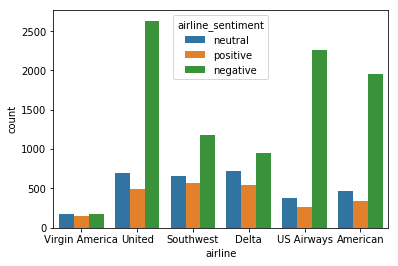

In [56]:
sns.countplot(df['airline'], hue=df['airline_sentiment'])

(array([  1.99000000e+02,   3.70000000e+01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   1.99000000e+02,
          1.75300000e+03,   1.70400000e+03,   2.85000000e+02,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   7.00000000e+00,
          5.00000000e+00,   1.04460000e+04]),
 array([ 0.335  ,  0.36825,  0.4015 ,  0.43475,  0.468  ,  0.50125,
         0.5345 ,  0.56775,  0.601  ,  0.63425,  0.6675 ,  0.70075,
         0.734  ,  0.76725,  0.8005 ,  0.83375,  0.867  ,  0.90025,
         0.9335 ,  0.96675,  1.     ]),
 <a list of 20 Patch objects>)

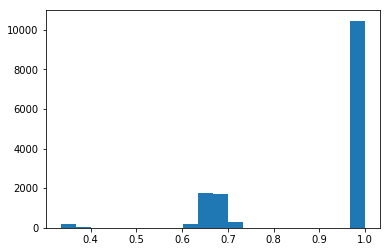

In [57]:
plt.hist(df['airline_sentiment_confidence'], bins=20)

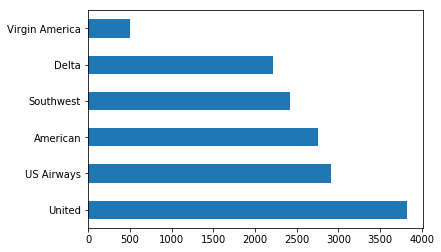

In [58]:
df['airline'].value_counts().plot(kind = 'barh')

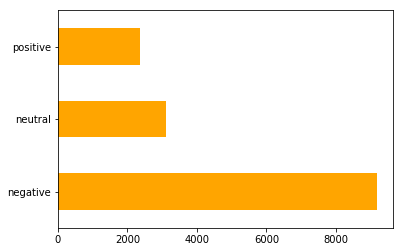

In [59]:
df['airline_sentiment'].value_counts().plot(kind ='barh', color ='orange')

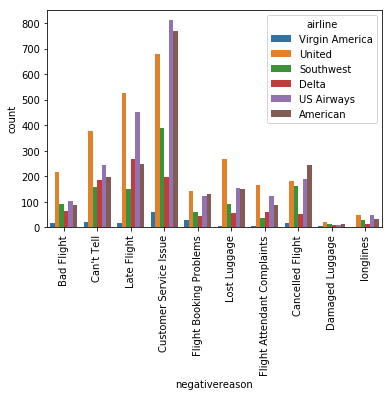

In [60]:
plt.xticks(rotation=(90))
sns.countplot(df['negativereason'], hue=df['airline'])

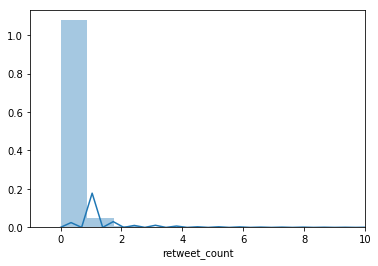

In [61]:
plt.xlim(-1,10)
sns.distplot(df['retweet_count'])

In [62]:
np.mean(df['retweet_count'])

0.08265027322404371

In [66]:
airline = [''.join(x.lower().split()) for x in list(df['airline'].unique())]

In [70]:
airline.append('americanair')

In [64]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]','',x).lower())

In [71]:
def texttest(val):
    val = val.split()
    for i in airline:
        if i in val:
            val.remove(i)
            
    return " ".join(val)
            

df['text'] = df['text'].apply(texttest)

In [72]:
df['text']

0                                       what dhepburn said
1        plus youve added commercials to the experience...
2        i didnt today must mean i need to take another...
3        its really aggressive to blast obnoxious enter...
4                  and its a really big bad thing about it
5        seriously would pay 30 a flight for seats that...
6        yes nearly every time i fly vx this ear worm w...
7        really missed a prime opportunity for men with...
8                               well i didntbut now i do d
9        it was amazing and arrived an hour early youre...
10       did you know that suicide is the second leadin...
11       i lt3 pretty graphics so much better than mini...
12       this is such a great deal already thinking abo...
13       virginmedia im flying your fabulous seductive ...
14                                                  thanks
15                            sfopdx schedule is still mia
16       so excited for my first cross country flight l.